In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [22]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
first_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(first_date)

2016-08-23


In [28]:
# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").\
order_by(Measurement.date).all()
print(year_prcp)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_prcp_df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation'])
year_prcp_df = year_prcp_df.set_index("Date")
#year_prcp_df.head()
year_prcp_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [30]:
# Sort the dataframe by date; dropped NA values.
year_prcp_df = year_prcp_df.dropna(how='any')
yearly_prcp = year_prcp_df.sort_values('Date')
yearly_prcp

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


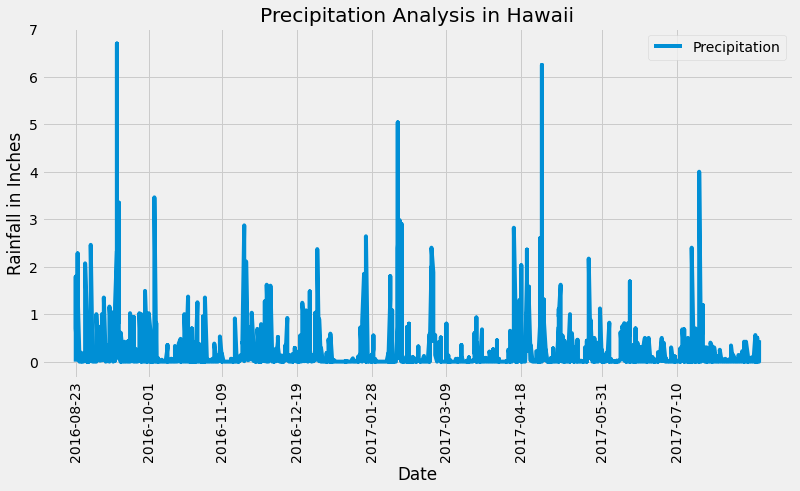

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12,6))
plt.plot(yearly_prcp.index, yearly_prcp['Precipitation'])
xloc=['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
plt.title("Precipitation Analysis in Hawaii")
plt.xlabel("Date")
plt.ylabel("Rainfall in Inches")
plt.xticks(xloc, rotation = "vertical")
plt.legend(['Precipitation'], loc = "upper right")
plt.tight_layout
plt.savefig("Images/Precipitation")
plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearly_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
#columns = inspector.get_columns('station')
session.query(Station.id).count()

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).\
    filter(Station.station == Measurement.station).group_by(Station.station).\
    order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = stations[0][0]
print(most_active, "is the most active station.")

USC00519281 is the most active station.


In [36]:
# The most active station calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_active = session.query(*sel).\
    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
most_active

(54.0, 85.0, 71.66378066378067)

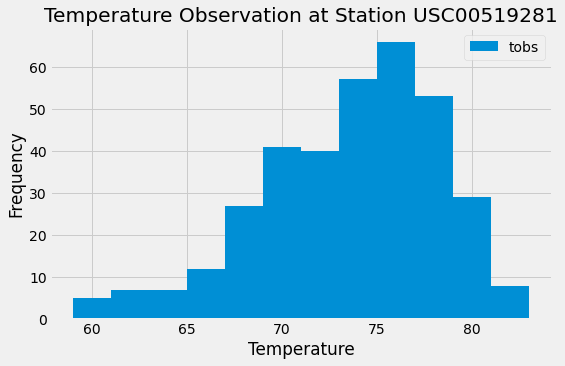

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.date >="2016-08-23").\
    filter(Measurement.date <="2017-08-23").\
    filter(Measurement.station == 'USC00519281').all()

plt.figure(figsize=(8,5))
plt.hist(np.ravel(results), bins = 12)
plt.title("Temperature Observation at Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'], loc = "upper right")
plt.tight_layout
plt.savefig("Images/tobs")
plt.show()

# Close session

In [38]:
# Close Session
session.close()